In [1]:
import numpy as np
from matplotlib import pyplot as plt
from generate_negative import *
import gzip

# Generating masks
* 6 blurs seems to work well

In [2]:
masks = generate_masks(4,10)

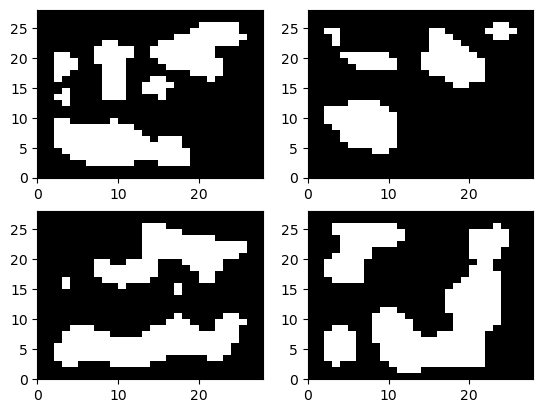

In [3]:
fig, ax = plt.subplots(2,2)
for i in range(4):
    ax[int(i/2), int(i%2)].pcolormesh(masks[i], cmap='binary_r')

plt.show()

# Generating negative data

In [4]:
src = "../data/train-images-idx3-ubyte.gz"
with gzip.open(src, 'rb') as f:
    data = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)

In [5]:
X_pos = data[:2000] # first 2000 positive examples

In [6]:
X_neg = generate_negatives(X_pos)

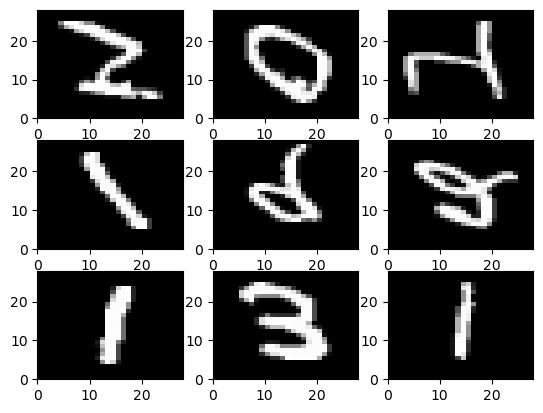

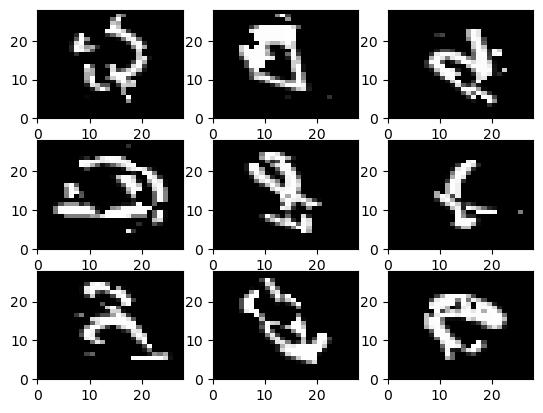

In [7]:
fig, ax = plt.subplots(3,3)
for i in range(9):
    ax[int(i/3), int(i%3)].pcolormesh(X_pos[i], cmap='binary_r')
plt.show()

fig, ax = plt.subplots(3,3)
for i in range(9):
    ax[int(i/3), int(i%3)].pcolormesh(X_neg[i], cmap='binary_r')
plt.show()

In [9]:
np.save('../data/X_neg', X_neg)
np.save('../data/X_pos', X_pos)